In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sc_func import *

## 数据导入

In [2]:
#花豹11月01/22+12月01/06
data_form1= pd.read_csv('D:\\python\\huabao\\tmp_score_huabao_variable0316_6.csv')
#诺亚点点17年1101-1201
#data_form1= pd.read_csv('D:\\python\\huabao\\tmp_score_nuoya_variable0426_3.csv')

In [3]:
data_form1.shape
data_form1[data_form1['type']==1].shape[0]/data_form1.shape[0]

0.08638564900075028

In [4]:
#诺亚点点17年12/02-18年01/08
data_form2= pd.read_csv('D:\\python\\huabao\\tmp_score_nuoya_variable0426_1.csv')

In [5]:
data_form2.shape

(1994, 35)

In [6]:
data_form2[data_form2['type']==1].shape[0]/data_form2.shape[0]

0.04714142427281846

In [51]:
#诺亚点点11月1-12月1
data_form3= pd.read_csv('D:\\python\\huabao\\tmp_score_nuoya_variable0426_3.csv')
data_form3.shape
data_form3[data_form3['type']==1].shape[0]/data_form3.shape[0]

0.08286674132138858

In [ ]:
#诺亚点点2018-02/10-02/25
data_form4= pd.read_csv('D:\\python\\huabao\\tmp_score_nuoya_variable0426_2.csv')

In [7]:
data_form=data_form1.append(data_form2)
#data_form=data_form1

In [8]:
data_form.shape

(31316, 35)

In [9]:
x_columns = [x for x in data_form.columns if x not in ['type']]
keep_list = x_columns
target = 'type'

In [10]:
#样本的bad_rate
data_form[data_form['type']==1].shape[0]/data_form.shape[0]

0.08388683101290076

## 变量筛选

In [11]:
#相关性删除
df=data_form
corr=df.corr()

In [12]:
corr.columns

Index(['type', 'cs', 'ls_od_b_6m', 'ls_od_b_1y', 'ls_od_b_2y', 'ls_od_f_1t',
       'ls_od_f_3t', 'ls_od_f_6t', 'xc_behavior', 'xc_overloan', 'xc_overdue',
       'xc_record', 'rv', 'rc_idname_multi', 'rc_relation_age',
       'rc_relation_cnt_name_phone', 'rc_relation_multi', 'rc_relation_cnt',
       'ls_cr', 'ls_cr_cl', 'ls_gp', 'ls_gp_cl', 'ls_nw', 'ls_nd', 'ld_od',
       'ld_rc', 'ld_xc', 'bs_gps5', 'bs_add5', 'bd_addr_abn_apply',
       'bd_gps5_abn_apply', 'bd_addr_abn_spend', 'bd_gps5_abn_spend',
       'dist_gps5_abn_beh', 'dist_gps5_abn_spend'],
      dtype='object')

In [13]:
type(corr.columns)

pandas.indexes.base.Index

In [14]:
x_columns = [x for x in corr.columns if x not in ['type']]
x_columns

['cs',
 'ls_od_b_6m',
 'ls_od_b_1y',
 'ls_od_b_2y',
 'ls_od_f_1t',
 'ls_od_f_3t',
 'ls_od_f_6t',
 'xc_behavior',
 'xc_overloan',
 'xc_overdue',
 'xc_record',
 'rv',
 'rc_idname_multi',
 'rc_relation_age',
 'rc_relation_cnt_name_phone',
 'rc_relation_multi',
 'rc_relation_cnt',
 'ls_cr',
 'ls_cr_cl',
 'ls_gp',
 'ls_gp_cl',
 'ls_nw',
 'ls_nd',
 'ld_od',
 'ld_rc',
 'ld_xc',
 'bs_gps5',
 'bs_add5',
 'bd_addr_abn_apply',
 'bd_gps5_abn_apply',
 'bd_addr_abn_spend',
 'bd_gps5_abn_spend',
 'dist_gps5_abn_beh',
 'dist_gps5_abn_spend']

In [15]:
corr[abs(corr)>0.5]

,type,cs,ls_od_b_6m,ls_od_b_1y,ls_od_b_2y,ls_od_f_1t,ls_od_f_3t,ls_od_f_6t,xc_behavior,xc_overloan,...,ld_rc,ld_xc,bs_gps5,bs_add5,bd_addr_abn_apply,bd_gps5_abn_apply,bd_addr_abn_spend,bd_gps5_abn_spend,dist_gps5_abn_beh,dist_gps5_abn_spend
type,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cs,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ls_od_b_6m,NaN,NaN,1.000000,0.745847,0.683357,NaN,0.521909,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ls_od_b_1y,NaN,NaN,0.745847,1.000000,0.801556,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ls_od_b_2y,NaN,NaN,0.683357,0.801556,1.000000,NaN,NaN,0.534315,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ls_od_f_1t,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ls_od_f_3t,NaN,NaN,0.521909,NaN,NaN,NaN,1.000000,0.816433,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ls_od_f_6t,NaN,NaN,NaN,NaN,0.534315,NaN,0.816433,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xc_behavior,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xc_overloan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## VAR BINNING RESULT 变量分组结果

In [16]:
#先平均分组看各变量的IV值
num_iv = pd.Series()
columns=list(data_form.columns)
for c in range(1,len(columns)):
         num_iv = num_iv.append(variable_binning(data_form, target,columns[c], 5,'iv'))
print(num_iv)

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = df[var].apply(lambda x: map_dict[x])


cs                            7.913218e-03
ls_od_b_6m                    7.920903e-28
ls_od_b_1y                    7.920903e-28
ls_od_b_2y                    7.920903e-28
ls_od_f_1t                    7.920903e-28
ls_od_f_3t                    7.920903e-28
ls_od_f_6t                    7.920903e-28
xc_behavior                   7.920903e-28
xc_overloan                   6.401374e-02
xc_overdue                    7.920903e-28
xc_record                     7.920903e-28
rv                            7.920903e-28
rc_idname_multi               7.920903e-28
rc_relation_age               7.920903e-28
rc_relation_cnt_name_phone    7.920903e-28
rc_relation_multi             7.920903e-28
rc_relation_cnt               7.920903e-28
ls_cr                         7.920903e-28
ls_cr_cl                      7.920903e-28
ls_gp                         7.920903e-28
ls_gp_cl                      7.920903e-28
ls_nw                         7.920903e-28
ls_nd                         7.920903e-28
ld_od      

## 逐个变量分组观察IV、占比、分组比例

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


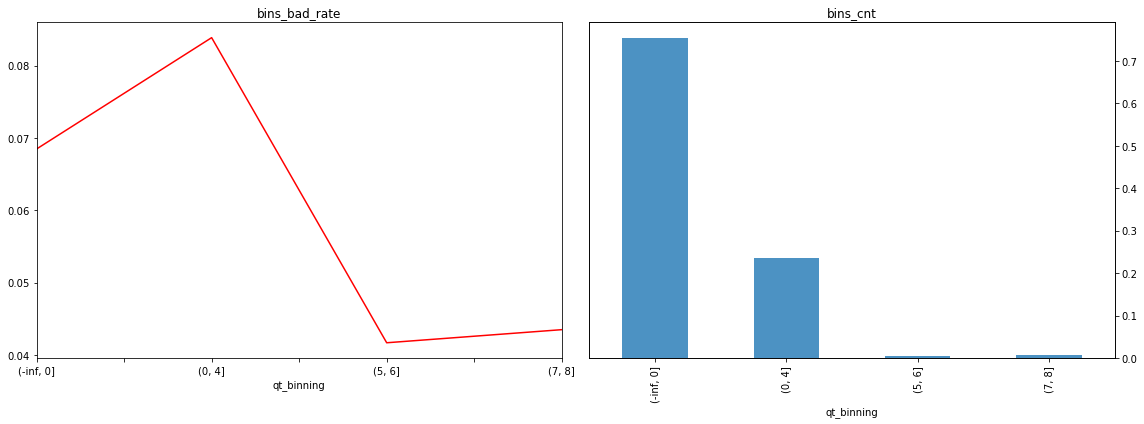

cs 变量的IV值为 0.011707525873486141


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,4863,0.752903,333,4530,0.717672,0.755630,0.068476,-0.051538,0.001956
"(0, 4]",3,4,1526,0.236259,128,1398,0.275862,0.233194,0.083879,0.168029,0.007169
"(5, 6]",6,6,24,0.003716,1,23,0.002155,0.003837,0.041667,-0.576698,0.000970
"(7, 8]",8,8,46,0.007122,2,44,0.004310,0.007339,0.043478,-0.532246,0.001612


In [17]:
var_name = 'cs' #变量
var_bin = variable_binning(data_form, target, var_name, [0,4,5,6,7,8], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_cs=var_bin['WOE']
var_bin.sort_values('Lbound')


C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


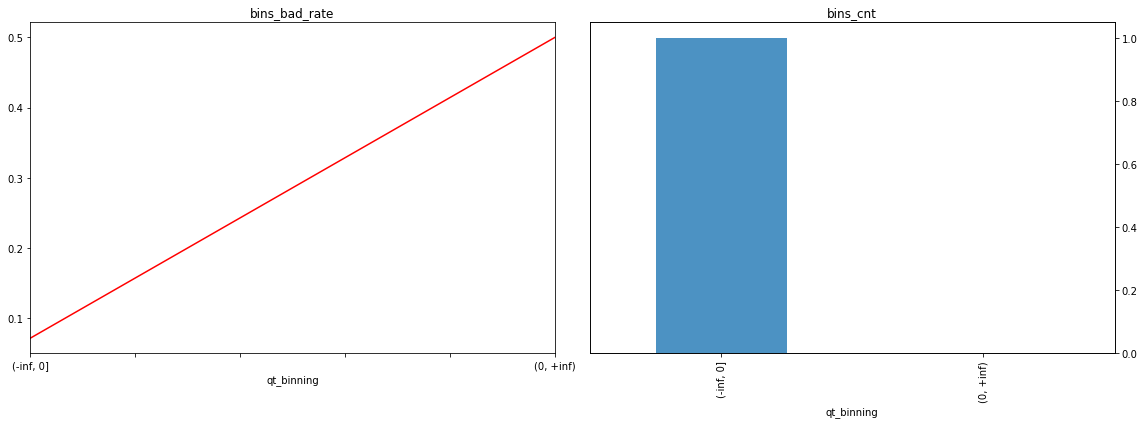

ls_od_f_6t 变量的IV值为 0.005091784090497163


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,6457,0.99969,463,5994,0.997845,0.999833,0.071705,-0.001991,0.000004
"(0, +inf)",1,1,2,0.00031,1,1,0.002155,0.000167,0.500000,2.558797,0.005088


In [23]:
var_name = 'ls_od_f_6t' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_od=var_bin['WOE']
var_bin.sort_values('Lbound')


C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


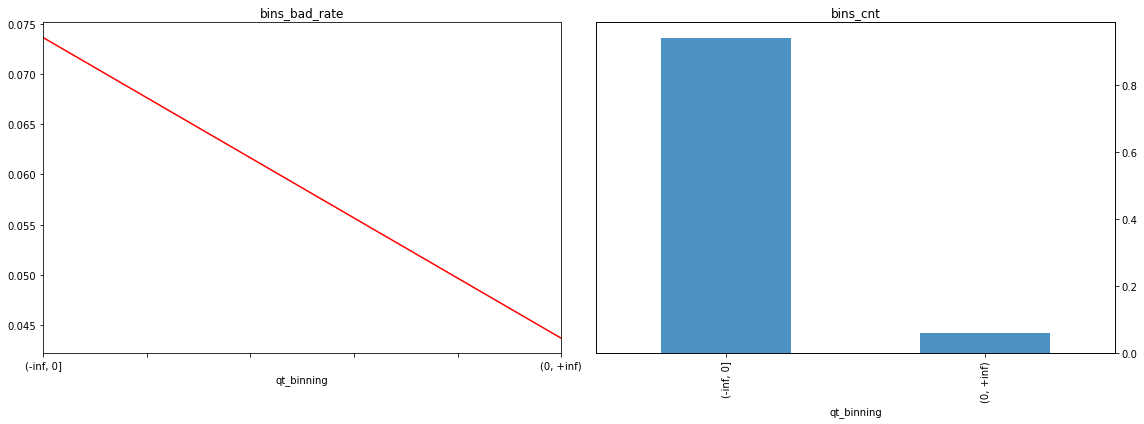

xc_behavior 变量的IV值为 0.014069537968345596


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,6070,0.939774,447,5623,0.963362,0.937948,0.073641,0.026735,0.000679
"(0, +inf)",1,1,389,0.060226,17,372,0.036638,0.062052,0.043702,-0.526884,0.013390


In [24]:
var_name = 'xc_behavior' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_xc_behavior=var_bin['WOE']
var_bin.sort_values('Lbound')


C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


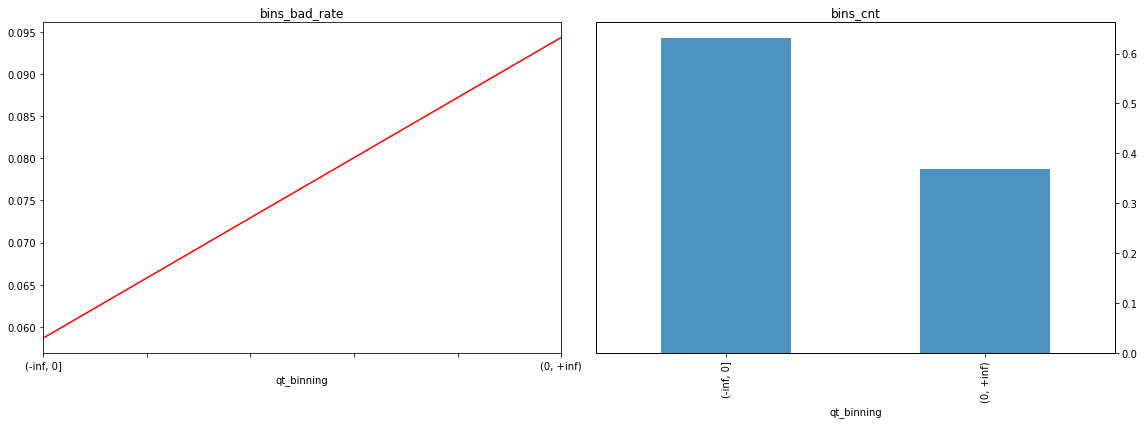

xc_overloan 变量的IV值为 0.06401373565805085


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,4074,0.630748,239,3835,0.515086,0.6397,0.058665,-0.216665,0.026999
"(0, +inf)",1,1,2385,0.369252,225,2160,0.484914,0.3603,0.094340,0.297033,0.037014


In [25]:
var_name = 'xc_overloan' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_xc_overloan=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


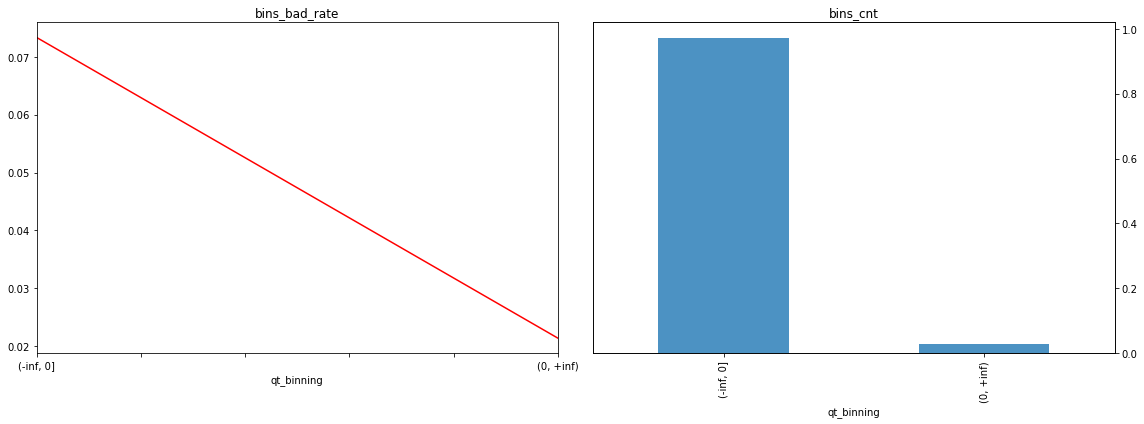

xc_overdue 变量的IV值为 0.028185677520759095


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,6272,0.971048,460,5812,0.991379,0.969475,0.073342,0.022343,0.000489
"(0, +inf)",1,1,187,0.028952,4,183,0.008621,0.030525,0.021390,-1.264395,0.027696


In [26]:
var_name = 'xc_overdue' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_xc_overdue=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


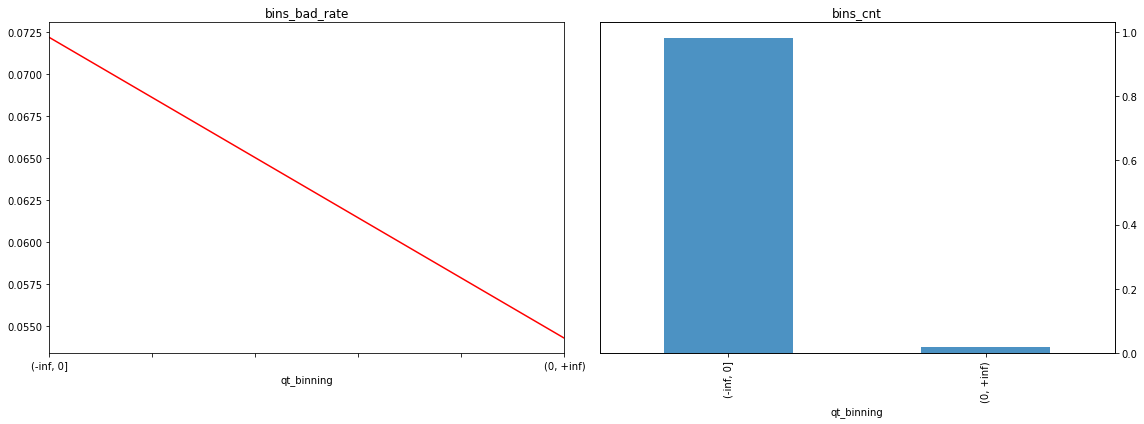

xc_record 变量的IV值为 0.001603826842361716


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,6330,0.980028,457,5873,0.984914,0.97965,0.072196,0.005359,0.000028
"(0, +inf)",1,1,129,0.019972,7,122,0.015086,0.02035,0.054264,-0.299314,0.001576


In [27]:
var_name = 'xc_record' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_xc_record=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)
C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


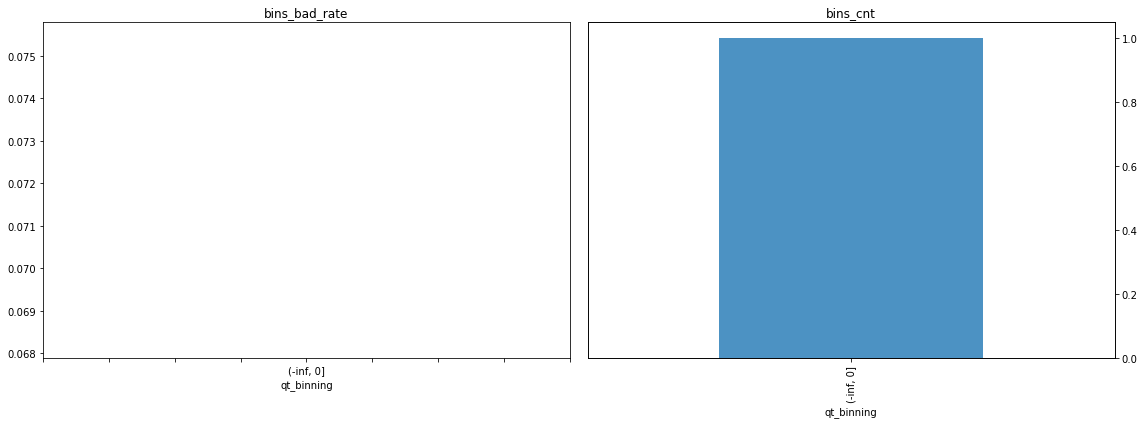

rv 变量的IV值为 7.920903045517491e-28


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,6459,1.0,464,5995,1,1.0,0.071838,2.819966e-14,7.920903e-28


In [28]:
var_name = 'rv' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_rv=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


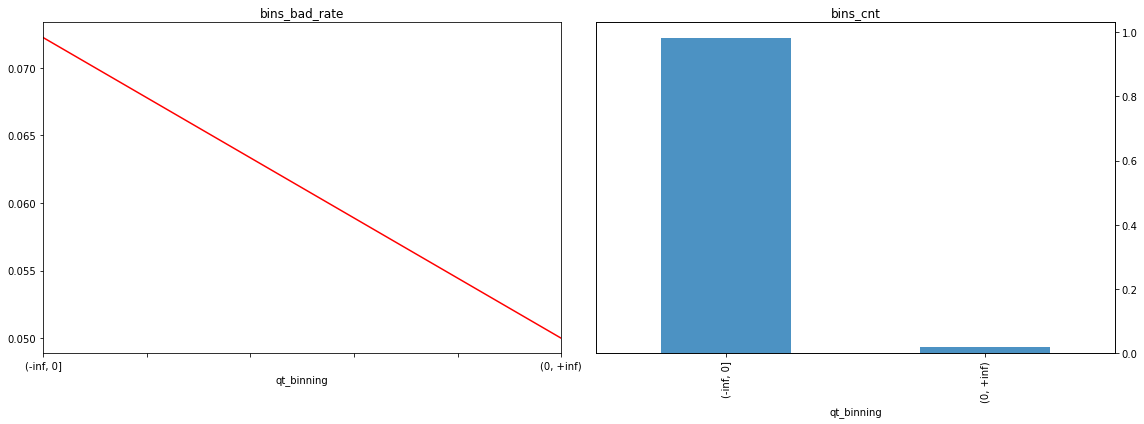

rc_relation_cnt 变量的IV值为 0.002384187987424816


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,6339,0.981421,458,5881,0.987069,0.980984,0.072251,0.006184,0.000038
"(0, +inf)",1,1,120,0.018579,6,114,0.012931,0.019016,0.050000,-0.385642,0.002347


In [34]:
var_name = 'rc_relation_cnt' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


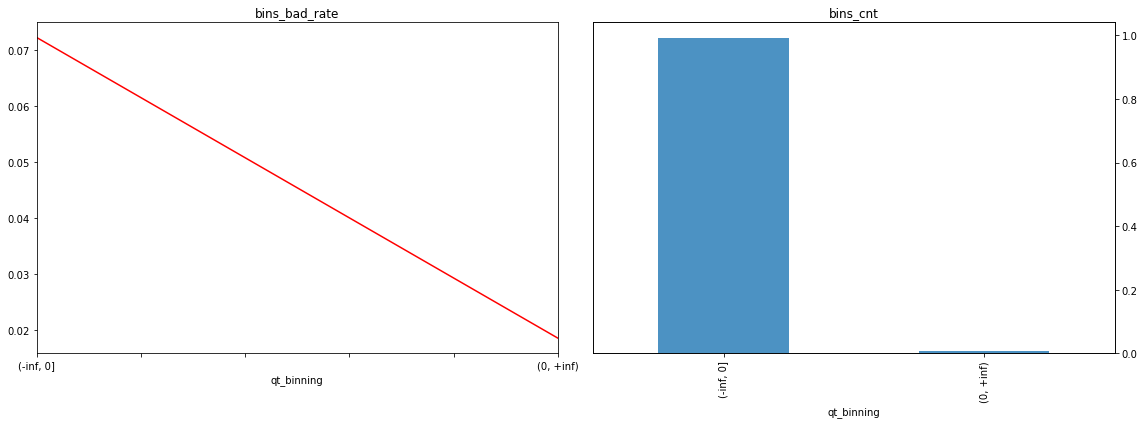

ls_cr 变量的IV值为 0.009481535799344461


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,6405,0.99164,463,5942,0.997845,0.991159,0.072287,0.006723,0.000045
"(0, +inf)",1,1,54,0.00836,1,53,0.002155,0.008841,0.018519,-1.411495,0.009437


In [35]:
var_name = 'ls_cr' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ls_cr=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


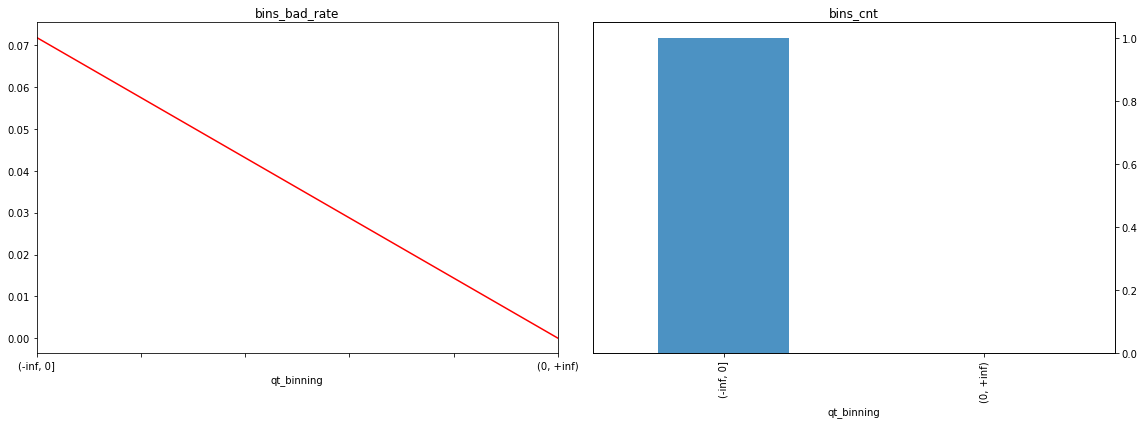

ls_cr_cl 变量的IV值为 0.0008484271755283


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,6458,0.999845,464,5994,1.000000,0.999833,0.071849,0.000167,2.782645e-08
"(0, +inf)",1,1,1,0.000155,0,1,0.000001,0.000167,0.000000,-5.116829,8.483993e-04


In [36]:
var_name = 'ls_cr_cl' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ls_cr_cl=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


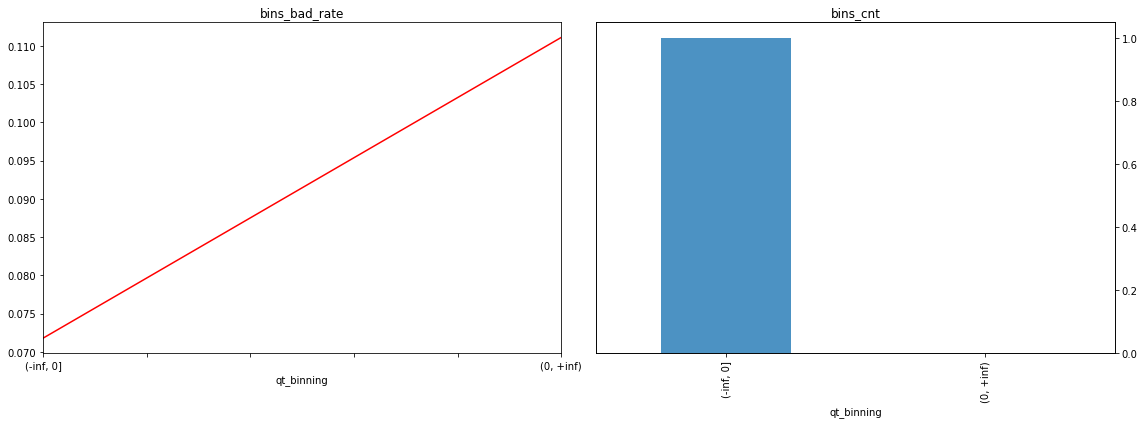

ls_gp 变量的IV值为 0.0003940943600875988


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,6450,0.998607,463,5987,0.997845,0.998666,0.071783,-0.000822,6.747703e-07
"(0, +inf)",1,1,9,0.001393,1,8,0.002155,0.001334,0.111111,0.479355,3.934196e-04


In [37]:
var_name = 'ls_gp' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ls_gp=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


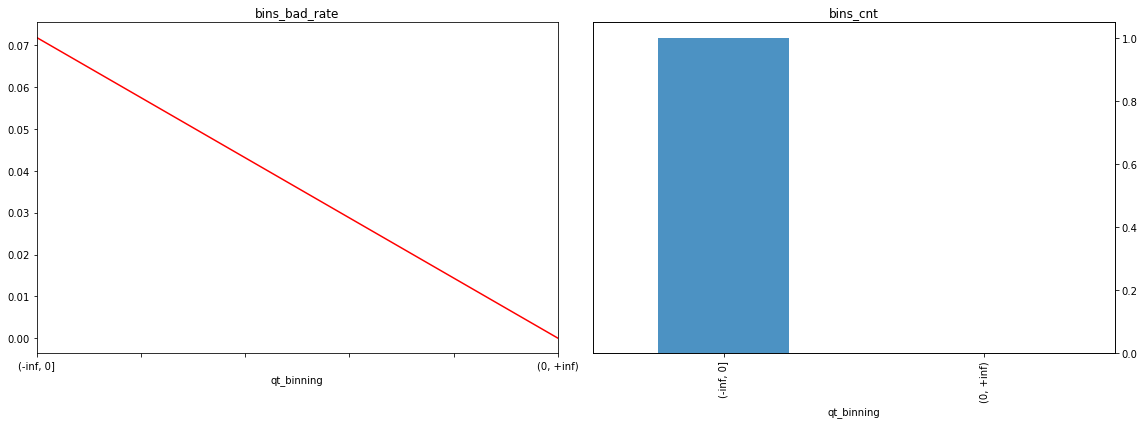

ls_gp_cl 变量的IV值为 0.0008484271755283


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,6458,0.999845,464,5994,1.000000,0.999833,0.071849,0.000167,2.782645e-08
"(0, +inf)",1,1,1,0.000155,0,1,0.000001,0.000167,0.000000,-5.116829,8.483993e-04


In [38]:
var_name = 'ls_gp_cl' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ls_gp_cl=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


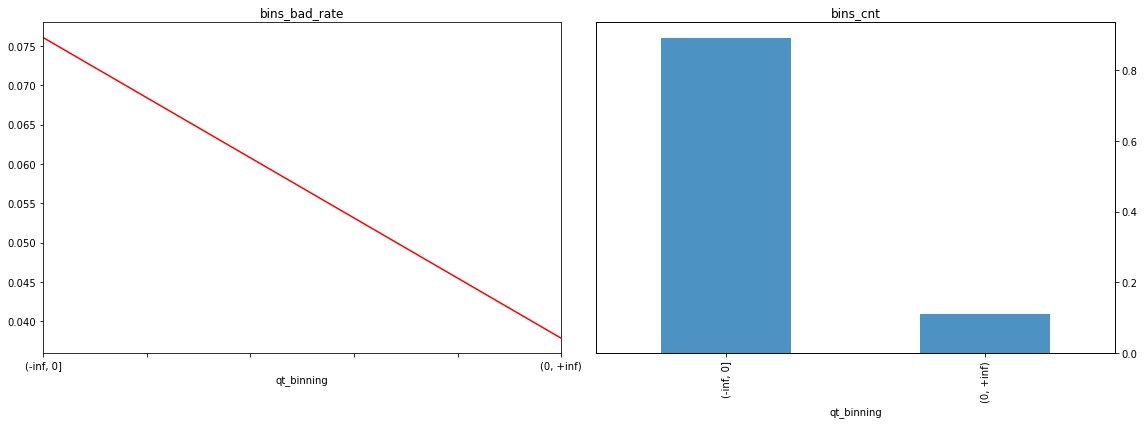

ls_nd 变量的IV值为 0.04149401426702839


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,5746,0.889611,437,5309,0.94181,0.885571,0.076053,0.061571,0.003463
"(0, +inf)",1,1,713,0.110389,27,686,0.05819,0.114429,0.037868,-0.676244,0.038031


In [41]:
var_name = 'ls_nd' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ls_nd=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


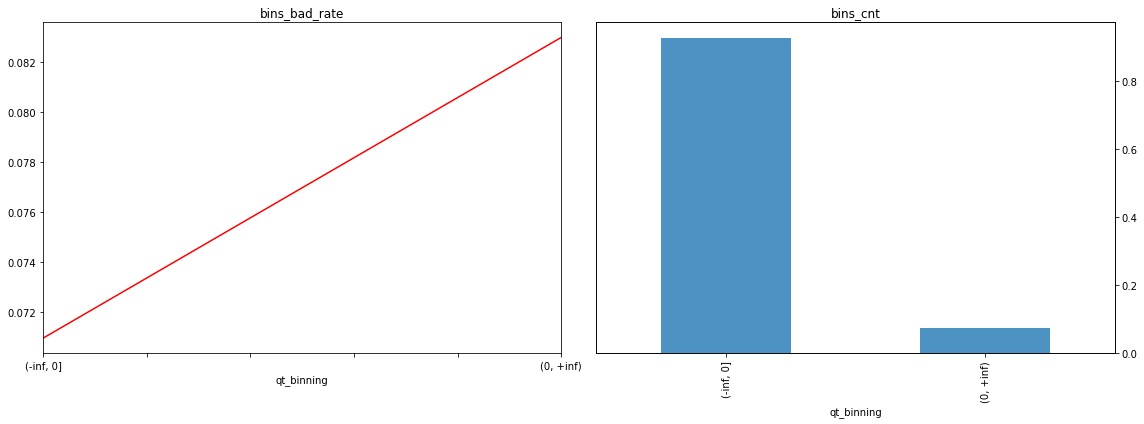

ld_rc 变量的IV值为 0.0021205172316033746


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,5977,0.925375,424,5553,0.913793,0.926272,0.070939,-0.013564,0.000169
"(0, +inf)",1,1,482,0.074625,40,442,0.086207,0.073728,0.082988,0.156366,0.001951


In [42]:
var_name = 'ld_rc' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ld_rc=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


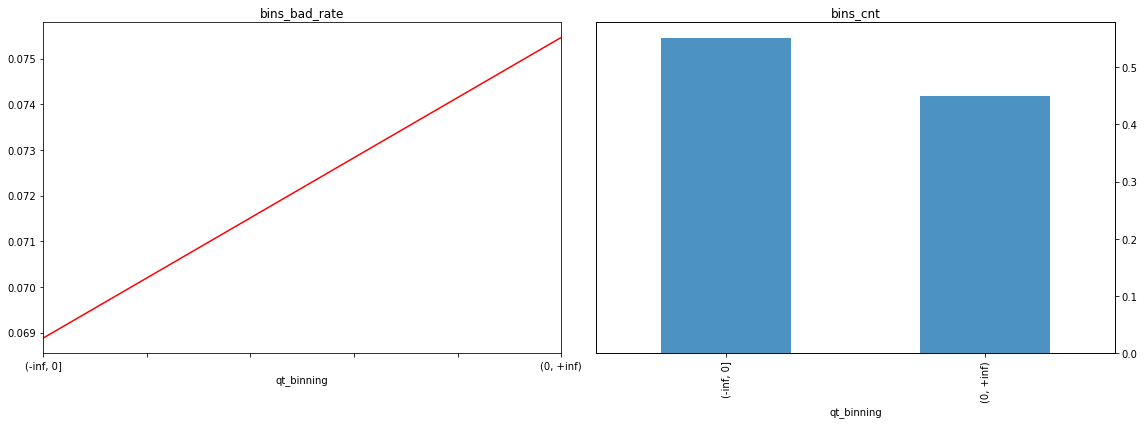

ld_xc 变量的IV值为 0.002405943000128543


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,3557,0.550704,245,3312,0.528017,0.55246,0.068878,-0.045253,0.001106
"(0, +inf)",1,1,2902,0.449296,219,2683,0.471983,0.44754,0.075465,0.053177,0.001300


In [43]:
var_name = 'ld_xc' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ld_xc=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


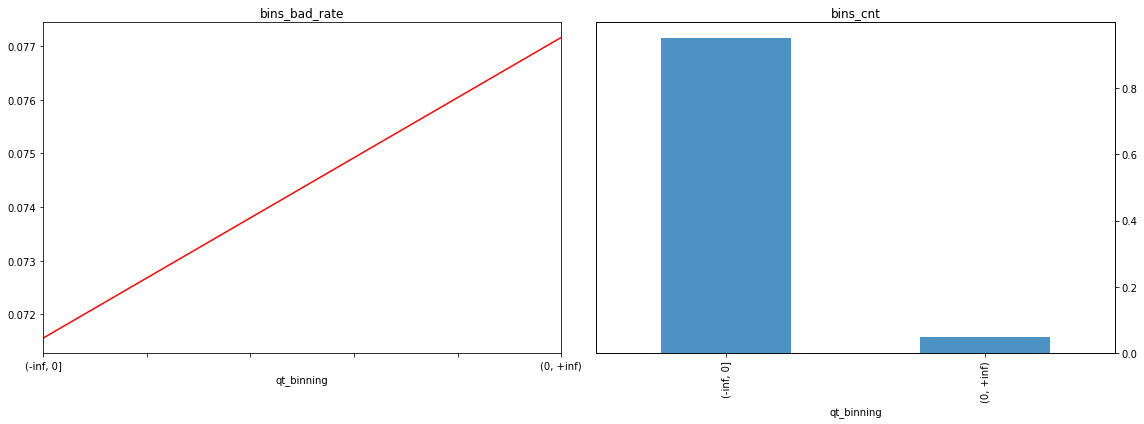

bs_gps5 变量的IV值为 0.0003261687451297551


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,6135,0.949837,439,5696,0.946121,0.950125,0.071557,-0.004224,0.000017
"(0, +inf)",1,1,324,0.050163,25,299,0.053879,0.049875,0.077160,0.077229,0.000309


In [44]:
var_name = 'bs_gps5' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_bs_gps5=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


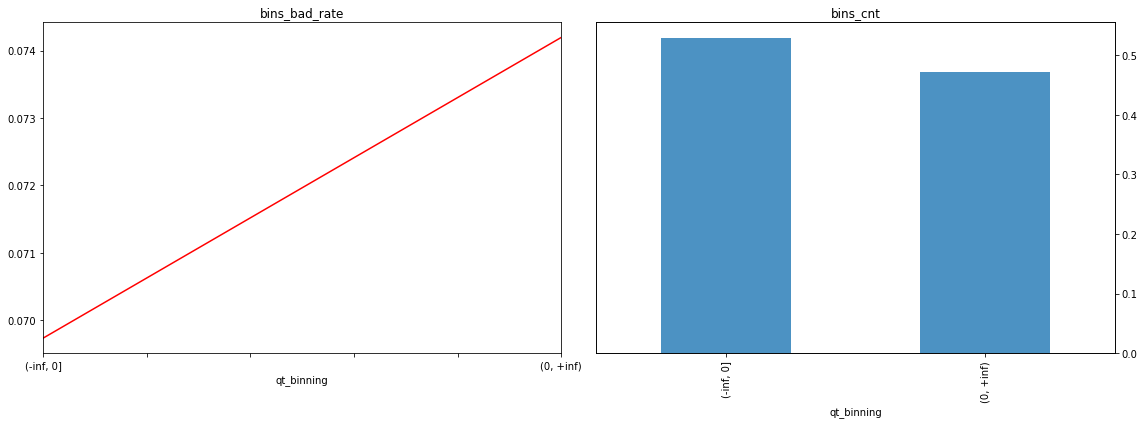

bs_add5 变量的IV值为 0.0011146066536260458


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,3413,0.52841,238,3175,0.512931,0.529608,0.069733,-0.031996,0.000534
"(0, +inf)",1,1,3046,0.47159,226,2820,0.487069,0.470392,0.074196,0.034839,0.000581


In [45]:
var_name = 'bs_add5' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ls_bs_add5=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


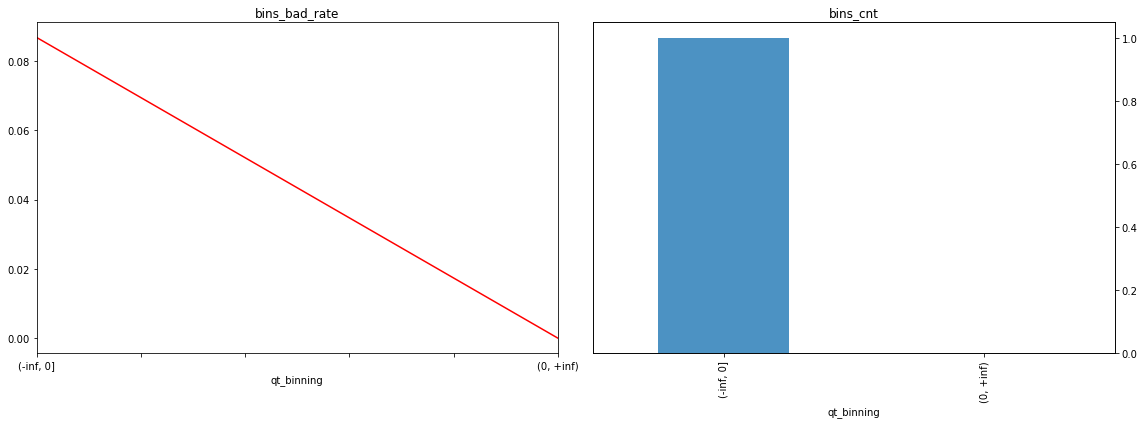

bd_addr_abn_apply 变量的IV值为 0.0017729415247932586


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,24716,0.999717,2145,22571,1.000000,0.99969,0.086786,0.000310,9.613742e-08
"(0, +inf)",1,1,7,0.000283,0,7,0.000001,0.00031,0.000000,-5.736689,1.772845e-03


In [42]:
var_name = 'bd_addr_abn_apply' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ls_bd_addr_abn_apply=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


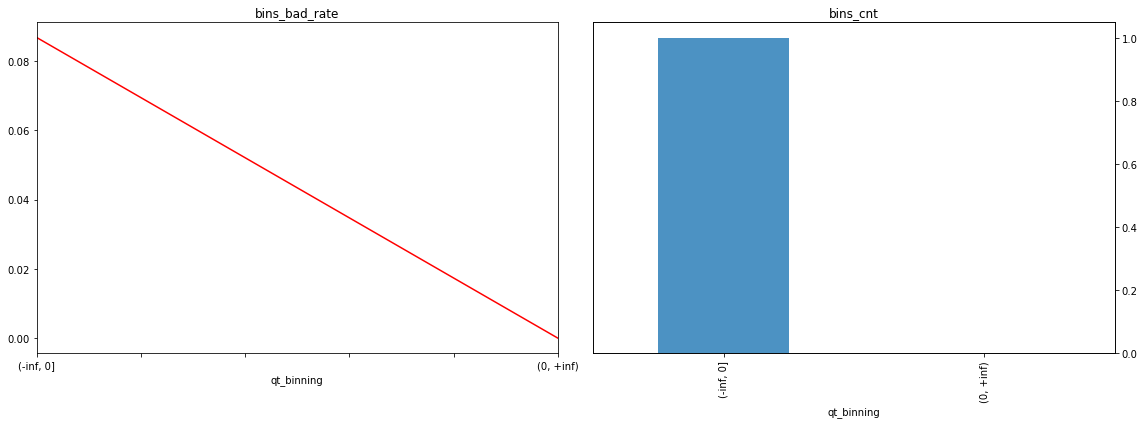

dist_gps5_abn_spend 变量的IV值为 0.0039809205264729475


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,24709,0.999434,2145,22564,1.000000,0.99938,0.08681,0.000620,3.846093e-07
"(0, +inf)",1,1,14,0.000566,0,14,0.000001,0.00062,0.00000,-6.429837,3.980536e-03


In [43]:
var_name = 'dist_gps5_abn_spend' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_dist_gps5_abn_beh=var_bin['WOE']
var_bin.sort_values('Lbound')

## 模型训练

In [11]:
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score

In [12]:
selected_var ={#'cs':[0,4,5,6,7],
               #'od':[0],
                'ls_od_b_1y':[0],
                'ls_od_b_2y':[0],
                #'ls_od_f_6t':[0],
               #'xc_behavior':[0],
               'xc_overloan':[0],
               'xc_overdue':[0],
               #'xc_record':[0],
               'rv':[0],
               'rc_idname_multi':[0],
                #'rc_relation_age':[0],
                #'rc_relation_multi':[0],
                'rc_relation_cnt':[0],
               'ls_cr':[0],
               'ls_cr_cl':[0],
               'ls_gp':[0],
               #'ls_gp_cl':[0],
               'ls_nd':[0],
               #'ld_rc':[0],
               'ld_xc':[0],
               'bs_gps5':[0]
              }

In [13]:
#WOE变换
WOE_train = WOE_mapping(data_form,selected_var, target)
train_X = WOE_train.drop(target, axis = 1)
train_X['constant'] = 1
train_Y = WOE_train[target]

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


In [14]:
logit = sm.Logit(train_Y, train_X).fit()
logit_params=logit.params
logit.summary()

Optimization terminated successfully.
         Current function value: 0.275449
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   type   No. Observations:                31316
Model:                          Logit   Df Residuals:                    31302
Method:                           MLE   Df Model:                           13
Date:                Sat, 28 Apr 2018   Pseudo R-squ.:                 0.04411
Time:                        18:12:46   Log-Likelihood:                -8626.0
converged:                       True   LL-Null:                       -9024.1
                                        LLR p-value:                9.067e-162
===================================================================================
                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
ls_od_b_1y          0.6388      0.938      0.681      0.496        -1.200     2.477
ls_od_b_2y          0.6531      0.825      0.792      0.428        -0.963     2.269
xc_overloan         0.9549      0.055     17.415      0.000         0.847     1.062
xc_overdue          0.6672      0.271      2.461      0.014         0.136     1.199
rv                  0.7748      0.244      3.171      0.002         0.296     1.254
rc_idname_multi     0.6395      0.426      1.501      0.133        -0.196     1.475
rc_relation_cnt     0.5695      0.410      1.390      0.164        -0.233     1.372
ls_cr               0.6379      0.119      5.347      0.000         0.404     0.872
ls_cr_cl            0.7662      0.077      9.970      0.000         0.616     0.917
ls_gp               0.1079      0.575      0.188      0.851        -1.018     1.234
ls_nd               0.3990      0.089      4.485      0.000         0.225     0.573
ld_xc               0.6842      0.183      3.738      0.000         0.325     1.043
bs_gps5             1.2100      0.496      2.439      0.015         0.238     2.182
constant           -2.3909      0.021   -111.927      0.000        -2.433    -2.349
===================================================================================
"""

In [15]:
#KS值
predict_Y = logit.predict(train_X)
KS_calculation(train_Y,predict_Y, 40)

0.2904261367025136

In [16]:
#ROC值
roc_auc_score(train_Y,predict_Y)

0.66206230281311318

## 打分

In [17]:
import math
score_data=data_form[['type']]
score_data['probability'] = predict_Y

#风险odds=15:1时，基本分数为500分
#风险翻倍时，即odds=15:2时，分数降低50分
B = 50/math.log(2, math.e)
A = 500 + B * math.log(1/15,math.e)

score_data['odds'] = (score_data['probability']/(1-score_data['probability']) ).apply(lambda x: math.log(x, math.e))
score_data['score'] = A - B * score_data['odds']

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [18]:
score_data['score'].sum()/score_data.shape[0]

488.6759452353589

In [19]:
score_data[score_data['score']<=600].shape[0]

30747

In [20]:
score_data[score_data['score']<=560].shape[0]/score_data.shape[0]

0.89695363392515

In [21]:
score_data[(score_data.score<=560) & (score_data.type==1)].shape[0]/score_data[score_data['score']<=560].shape[0]

0.09056926198867885

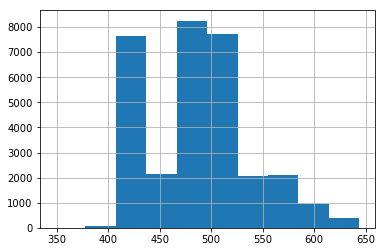

In [22]:
#分数区间
score_data.score.hist()
plt.show()

In [26]:
#分数分段
var_name = 'score' #变量
#bins=[460,490,530,540,550]
bins=10
var_bin = variable_binning(score_data, target, var_name, bins, 'bins')
#var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = df[var].apply(lambda x: map_dict[x])


In [27]:
def binning_plot(df):
    '''
    plot Y_rate and bin_percent curves
    '''
    plt.figure(figsize=(16, 6))
    plt.subplot(121)
    df['Y_rate'].plot()
    plt.title('bins_bad_rate')

    plt.subplot(122)
    df['PctTotal'].plot.bar(secondary_y=True,alpha = 0.8, grid = False)
    plt.title('bins_cnt')
    
    plt.tight_layout()
    plt.show()

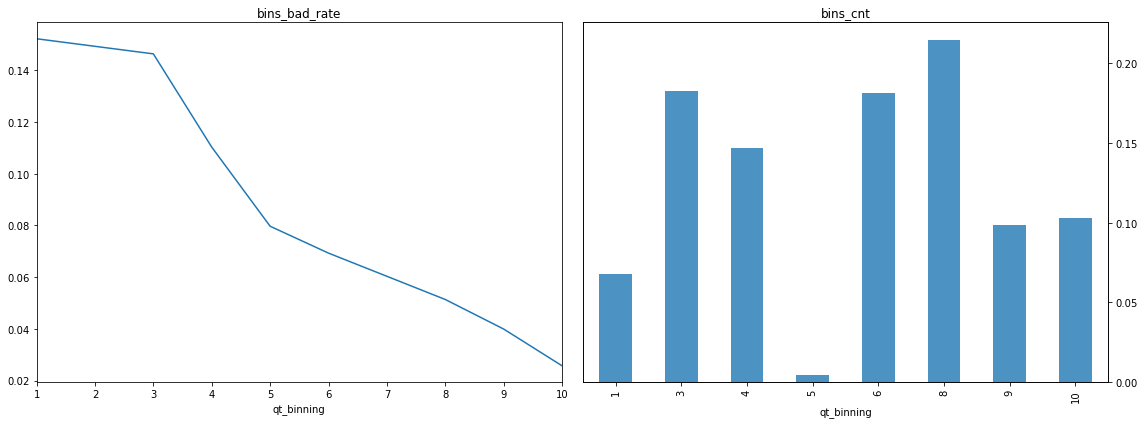

In [28]:
binning_plot(var_bin)

In [30]:
var_bin

,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
1,348.084285,433.864446,2135,0.068176,325,1810,0.123715,0.063090,0.152225,0.673414,0.040826
3,434.626807,445.156177,5725,0.182814,838,4887,0.318995,0.170344,0.146376,0.627355,0.093257
4,447.087367,487.039226,4596,0.146762,507,4089,0.192996,0.142528,0.110313,0.303127,0.015298
5,487.111193,487.360562,138,0.004407,11,127,0.004187,0.004427,0.079710,-0.055621,0.000013
6,488.210296,500.578259,5684,0.181505,394,5290,0.149981,0.184391,0.069317,-0.206551,0.007107
8,500.670855,518.611460,6734,0.215034,346,6388,0.131709,0.222664,0.051381,-0.525066,0.047757
9,518.953426,560.815845,3079,0.098320,123,2956,0.046821,0.103036,0.039948,-0.788737,0.044338
10,560.908441,643.902069,3225,0.102983,83,3142,0.031595,0.109519,0.025736,-1.243103,0.096868


## 变量分组打分

In [31]:
selected_var ={#'cs':[0,4,5,6,7],
               #'od':[0],
                'ls_od_b_1y':[0],
                'ls_od_b_2y':[0],
                #'ls_od_f_6t':[0],
               #'xc_behavior':[0],
               'xc_overloan':[0],
               'xc_overdue':[0],
               #'xc_record':[0],
               'rv':[0],
               'rc_idname_multi':[0],
                #'rc_relation_age':[0],
                #'rc_relation_multi':[0],
                'rc_relation_cnt':[0],
               'ls_cr':[0],
               'ls_cr_cl':[0],
               'ls_gp':[0],
               #'ls_gp_cl':[0],
               'ls_nd':[0],
               #'ld_rc':[0],
               'ld_xc':[0],
               'bs_gps5':[0]
              }
#各变量分组的WOE集合放在一个字典中
def var_woe_result(df, target, select_var):
    output_df = select_var
    var_list = list(select_var.keys())
    for i in var_list:
        output_df[i] = variable_binning(df, target, i,select_var.get(i), 'bins')['WOE'] #select_var.get(i)返回字典中键的关联值即分组的切割值bin
    return output_df

var_woe_result=var_woe_result(data_form,target,selected_var)

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


In [32]:
#乘以模型参数得出变量分
variable_score=var_woe_result
var_list = list(var_woe_result.keys())
for i in var_list:
    variable_score[i] = var_woe_result.get(i)*logit_params[i]*B*(-1)

In [33]:
variable_score

{'bs_gps5': qt_binning
 (-inf, 0]     0.899932
 (0, +inf)   -15.535534
 Name: WOE, dtype: float64, 'ld_xc': qt_binning
 (-inf, 0]   -4.739835
 (0, +inf)    7.720725
 Name: WOE, dtype: float64, 'ls_cr': qt_binning
 (-inf, 0]    -2.125150
 (0, +inf)    52.804539
 Name: WOE, dtype: float64, 'ls_cr_cl': qt_binning
 (-inf, 0]    -8.881216
 (0, +inf)    51.356370
 Name: WOE, dtype: float64, 'ls_gp': qt_binning
 (-inf, 0]   -0.043717
 (0, +inf)    2.047575
 Name: WOE, dtype: float64, 'ls_nd': qt_binning
 (-inf, 0]    -3.520877
 (0, +inf)    24.543062
 Name: WOE, dtype: float64, 'ls_od_b_1y': qt_binning
 (-inf, 0]     0.052328
 (0, +inf)   -31.605766
 Name: WOE, dtype: float64, 'ls_od_b_2y': qt_binning
 (-inf, 0]     0.051970
 (0, +inf)   -40.734217
 Name: WOE, dtype: float64, 'rc_idname_multi': qt_binning
 (-inf, 0]     0.338184
 (0, +inf)   -13.293445
 Name: WOE, dtype: float64, 'rc_relation_cnt': qt_binning
 (-inf, 0]    0.418813
 (0, +inf)   -9.704521
 Name: WOE, dtype: float64, 'rv': qt_b

In [34]:
logit_params['constant']*B

-172.46370117301998

## 模型基础分数

In [35]:
base_score=A-logit_params['constant']*B
base_score

477.11917139259401

In [36]:
B

72.13475204444818

In [37]:
A

304.65547021957406

In [35]:
#打分详情下载
import math
score_data1=data_form[['type',
                'ls_od_b_1y',
                'ls_od_b_2y',
               'xc_overloan',
               'xc_overdue',
               'rv',
               'rc_idname_multi',
                'rc_relation_cnt',
               'ls_cr',
               'ls_cr_cl',
               'ls_gp',
               'ls_nd',
               'ld_xc',
               'bs_gps5']]
score_data1['probability'] = predict_Y

#风险odds=15:1时，基本分数为660分
#风险翻倍时，即odds=15:2时，分数降低50分
B = 50/math.log(2, math.e)
A = 500 + B * math.log(1/15,math.e)

score_data1['odds'] = (score_data['probability']/(1-score_data['probability']) ).apply(lambda x: math.log(x, math.e))
score_data1['score'] = A - B * score_data['odds']

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

## 低分段人群的规则命中情况

In [220]:
#低分段人群的规则命中分布
columns1=list(score_data1.columns)
rules1=pd.Series(index=columns1)
for i in columns1:  
         rules1[i]=score_data1[(score_data1.score<=470)& (score_data1[i]==1) ].shape[0]/score_data1[score_data1['score']<=470].shape[0]

In [221]:
rules1

type               0.144888
ls_od_b_1y         0.003428
ls_od_b_2y         0.002722
xc_overloan        0.987699
xc_overdue         0.086913
rv                 0.067251
rc_idname_multi    0.030954
rc_relation_cnt    0.055152
ls_cr              0.000504
ls_cr_cl           0.002017
ls_gp              0.012402
ls_nd              0.016435
ld_xc              0.298951
bs_gps5            0.058480
probability        0.000000
odds               0.000000
score              0.000000
dtype: float64

In [222]:
#低分段人群的规则命中时的bad_rate
columns1=list(score_data1.columns)
rules2=pd.Series(index=columns1)
for i in columns1:
    if(score_data1[(score_data1.score<=470)& (score_data1[i]==1) ].shape[0]==0):
        rules2[i]=0
    else:
         rules2[i]=score_data1[(score_data1.score<=470)& (score_data1[i]==1)& (score_data1.type==1)].shape[0]/score_data1[(score_data1.score<=470)& (score_data1[i]==1) ].shape[0]

In [223]:
rules2

type               1.000000
ls_od_b_1y         0.176471
ls_od_b_2y         0.185185
xc_overloan        0.145161
xc_overdue         0.155452
rv                 0.134933
rc_idname_multi    0.153094
rc_relation_cnt    0.148080
ls_cr              0.000000
ls_cr_cl           0.200000
ls_gp              0.130081
ls_nd              0.092025
ld_xc              0.141990
bs_gps5            0.141379
probability        0.000000
odds               0.000000
score              0.000000
dtype: float64

In [289]:
#详情下载
score_data1.to_csv('score_data1.csv')

## 高分段人数

In [224]:
#低分段人群的规则命中分布
columns3=list(score_data1.columns)
rules3=pd.Series(index=columns1)
for i in columns1:  
         rules3[i]=score_data1[(score_data1.score>450)& (score_data1[i]==1) ].shape[0]/score_data1[score_data1['score']>450].shape[0]

In [225]:
rules3

type               0.056199
ls_od_b_1y         0.000831
ls_od_b_2y         0.000185
xc_overloan        0.154155
xc_overdue         0.057491
rv                 0.056799
rc_idname_multi    0.019656
rc_relation_cnt    0.031745
ls_cr              0.088220
ls_cr_cl           0.306603
ls_gp              0.028699
ls_nd              0.253634
ld_xc              0.452729
bs_gps5            0.048540
probability        0.000000
odds               0.000000
score              0.000000
dtype: float64

## 测试样本1

In [38]:
#诺亚点点2018-02/10-02/23数据
#data_test = pd.read_csv('D:\\python\\huabao\\tmp_score_nuoya_variable0425_1.csv')
#诺亚点点2018-02/10-02/23数据2
#data_test = pd.read_csv('D:\\python\\huabao\\tmp_score_nuoya_variable0426_2.csv')
#data_test.shape

#诺亚点点数据集时间段：2017-11/01-2017-12/01——首次
data_test = pd.read_csv('D:\\python\\huabao\\tmp_score_nuoya_variablerank0426_3.csv')
data_test.shape

(4295, 35)

In [39]:
#样本的bad_rate
data_test[data_test['type']==1].shape[0]/data_test.shape[0]

0.08218859138533179

### 测试样本区隔力KS

In [40]:
selected_var ={#'cs':[0,4,5,6,7],
               #'od':[0],
                'ls_od_b_1y':[0],
                'ls_od_b_2y':[0],
                #'ls_od_f_6t':[0],
               #'xc_behavior':[0],
               'xc_overloan':[0],
               'xc_overdue':[0],
               #'xc_record':[0],
               'rv':[0],
               'rc_idname_multi':[0],
                #'rc_relation_age':[0],
                #'rc_relation_multi':[0],
                'rc_relation_cnt':[0],
               'ls_cr':[0],
               'ls_cr_cl':[0],
               'ls_gp':[0],
               #'ls_gp_cl':[0],
               'ls_nd':[0],
               #'ld_rc':[0],
               'ld_xc':[0],
               'bs_gps5':[0]
              }
#WOE变换
WOE_test = WOE_mapping(data_test,selected_var, target)
test_X = WOE_test.drop(target, axis = 1)
test_X['constant'] = 1
test_Y = WOE_test[target]

#KS值
predict_test_Y = logit.predict(test_X)
KS_calculation(test_Y,predict_test_Y, 40)

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


0.19816574034549136

In [41]:
roc_auc_score(test_Y,predict_test_Y)

0.60957179384359328

## 测试样本分数分布

In [42]:
import math
score_test=data_test[['type']]
score_test['probability'] = predict_test_Y

#风险odds=15:1时，基本分数为660分
#风险翻倍时，即odds=15:2时，分数降低50分
B = 50/math.log(2, math.e)
A = 500 + B * math.log(1/15,math.e)

score_test['odds'] = (score_test['probability']/(1-score_test['probability']) ).apply(lambda x: math.log(x, math.e))
score_test['score'] = A - B * score_test['odds']

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [49]:
#分数分段
#bins=[460,490,530,540,550]
bins=10
var_bin_test = variable_binning(score_test, target, var_name, bins, 'bins')
#var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = df[var].apply(lambda x: map_dict[x])


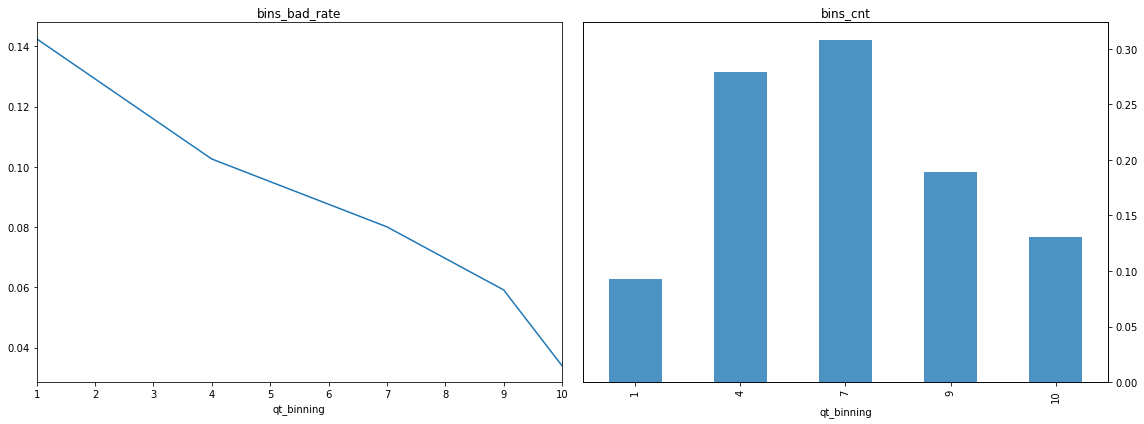

In [50]:
binning_plot(var_bin_test)

In [51]:
var_bin_test

,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
1,440.244630,447.718306,400,0.093132,57,343,0.161473,0.087012,0.142500,0.618296,0.046039
4,452.824468,487.822175,1199,0.279162,123,1076,0.348442,0.272958,0.102585,0.244154,0.018430
7,487.877425,495.295852,1324,0.308265,106,1218,0.300283,0.308980,0.080060,-0.028551,0.000248
9,495.351101,516.795484,812,0.189057,48,764,0.135977,0.193810,0.059113,-0.354391,0.020495
10,522.011744,1197.111720,560,0.130384,19,541,0.053824,0.137240,0.033929,-0.936005,0.078077


## 低分段人群命中规则分布

In [113]:
import math
score_data_test=data_form[['type',
                'ls_od_b_1y',
                'ls_od_b_2y',
               'xc_overloan',
               'xc_overdue',
               'rv',
               'rc_idname_multi',
                'rc_relation_cnt',
               'ls_cr',
               'ls_cr_cl',
               'ls_gp',
               'ls_nd',
               'ld_xc',
               'bs_gps5']]
score_data_test['probability'] = predict_Y

#风险odds=15:1时，基本分数为660分
#风险翻倍时，即odds=15:2时，分数降低50分
B = 50/math.log(2, math.e)
A = 500 + B * math.log(1/15,math.e)

score_data_test['odds'] = (score_data['probability']/(1-score_data['probability']) ).apply(lambda x: math.log(x, math.e))
score_data_test['score'] = A - B * score_data['odds']

#低分段人群的规则命中分布
columns1=list(score_data_test.columns)
rules1=pd.Series(index=columns1)
for i in columns1:  
         rules1[i]=score_data_test[(score_data_test.score<=470)& (score_data_test[i]==1) ].shape[0]/score_data_test[score_data_test['score']<=470].shape[0]

rules1

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

type               0.133863
ls_od_b_1y         0.002619
ls_od_b_2y         0.002058
xc_overloan        0.987184
xc_overdue         0.081852
rv                 0.066885
rc_idname_multi    0.030309
rc_relation_cnt    0.051824
ls_cr              0.000935
ls_cr_cl           0.007016
ls_gp              0.011506
ls_nd              0.002806
ld_xc              0.295510
bs_gps5            0.059308
probability        0.000000
odds               0.000000
score              0.000000
dtype: float64

## 测试样本稳定性PSI

In [76]:
def model_psi(var_bin,var_bin_test):
    PSI_in=pd.DataFrame()
    PSI_in['Y_pct1']=var_bin.PctTotal
    PSI_in['Y_pct2']=var_bin_test.PctTotal
    psi_result=pd.DataFrame()
    psi_result['rate1'] = (PSI_in['Y_pct1']/PSI_in['Y_pct2']).map(lambda x:log(x))
    psi_result['rate2'] = (PSI_in['Y_pct1'] - PSI_in['Y_pct2']) * psi_result['rate1']
    psi = psi_result['rate2'].sum()
    return psi_result

In [96]:
psi_result=model_psi(var_bin,var_bin_test)
psi = psi_result['rate2'].sum()
psi

0.43274804209776935

In [97]:
var_bin.PctTotal

qt_binning
(-inf, 460]    0.314662
(460, 490]     0.072461
(490, 530]     0.394035
(530, 540]     0.062718
(540, 550]     0.055180
(550, +inf)    0.100944
Name: PctTotal, dtype: float64

In [98]:
var_bin_test.PctTotal

qt_binning
(-inf, 460]    0.236815
(460, 490]     0.287525
(490, 530]     0.240365
(540, 550]     0.064402
(550, +inf)    0.170892
Name: PctTotal, dtype: float64

In [99]:
psi_result['rate2']

qt_binning
(-inf, 460]    0.022125
(460, 490]     0.296416
(490, 530]     0.075956
(530, 540]          NaN
(540, 550]     0.001425
(550, +inf)    0.036825
Name: rate2, dtype: float64

## 诺亚点点数据测试2

In [118]:
data_tg = pd.read_csv('D:\\python\\huabao\\tmp_score_nuoya_daihou_test_0326.csv')
#data_tg['type']=1 #加个常数项做type列，方便后面调用函数运算
data_tg.shape

(4565, 15)

In [119]:
#样本的bad_rate
data_tg[data_tg['type']==1].shape[0]/data_tg.shape[0]

0.07097480832420591

In [120]:
data_tg[data_tg['type']==1].shape[0]

324

In [121]:
bins_tg =[450,500,520,550]
var_bin_tg = variable_binning(data_tg, target, var_name, bins_tg, 'bins')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


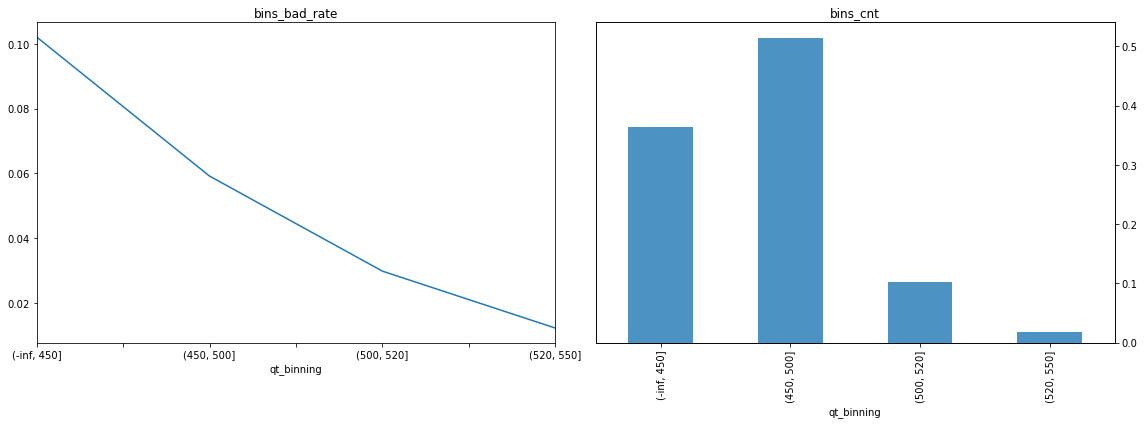

In [122]:
binning_plot(var_bin_tg)

In [105]:
var_bin_tg

,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 460]",409,460,1722,0.377218,170,1552,0.524691,0.365951,0.098722,0.360310,0.057196
"(460, 490]",462,490,1038,0.227382,56,982,0.172840,0.231549,0.053950,-0.292429,0.017168
"(490, 530]",495,527,1803,0.394962,98,1705,0.302469,0.402028,0.054354,-0.284542,0.028329
"(530, 540]",540,540,1,0.000219,0,1,0.000001,0.000236,0.000000,-5.462956,0.001283
"(540, 550]",543,543,1,0.000219,0,1,0.000001,0.000236,0.000000,-5.462956,0.001283


In [106]:
psi_result=model_psi(var_bin,var_bin_tg)
psi = psi_result['rate2'].sum()
psi

0.8459501315704256

In [107]:
4565/533519

0.008556396304536484

In [111]:
selected_var ={#'cs':[0,4,5,6,7],
               #'od':[0],
                'ls_od_b_1y':[0],
                'ls_od_b_2y':[0],
                #'ls_od_f_6t':[0],
               #'xc_behavior':[0],
               'xc_overloan':[0],
               'xc_overdue':[0],
               #'xc_record':[0],
               'rv':[0],
               'rc_idname_multi':[0],
                #'rc_relation_age':[0],
                #'rc_relation_multi':[0],
                'rc_relation_cnt':[0],
               'ls_cr':[0],
               'ls_cr_cl':[0],
               #'ls_gp':[0],
               #'ls_gp_cl':[0],
               'ls_nd':[0],
               #'ld_rc':[0],
               'ld_xc':[0],
               'bs_gps5':[0]
              }

#WOE变换
WOE_tg = WOE_mapping(data_tg,selected_var, target)
tg_X = WOE_tg.drop(target, axis = 1)
tg_X['constant'] = 1
tg_Y = WOE_tg[target]

#KS值
predict_tg_Y = logit.predict(tg_X)
KS_calculation(tg_Y,predict_tg_Y, 40)

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


ValueError: shapes (4565,13) and (14,) not aligned: 13 (dim 1) != 14 (dim 0)

In [110]:
roc_auc_score(tg_Y,predict_tg_Y)

0.62409830840035985

## 算话评分测试

In [297]:
data_sh = pd.read_csv('D:\\python\\huabao\\tmp_suanhua_test0330.csv')
#data_tg['type']=1 #加个常数项做type列，方便后面调用函数运算
data_sh.shape

(4156, 7)

In [298]:
#样本的bad_rate
data_sh[data_sh['type']==1].shape[0]/data_sh.shape[0]

0.1737247353224254

In [299]:
data_sh[data_sh['type']==1].shape[0]

722

In [340]:
data_sh1_xuni=data_sh[data_sh['product_category']=='余额代偿']

In [344]:
bins_sh1 =[540,550,560,570,580]
var_sh1='score1'
var_bin_sh1 = variable_binning(data_sh1_xuni, target, var_sh1, bins_sh1, 'bins')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


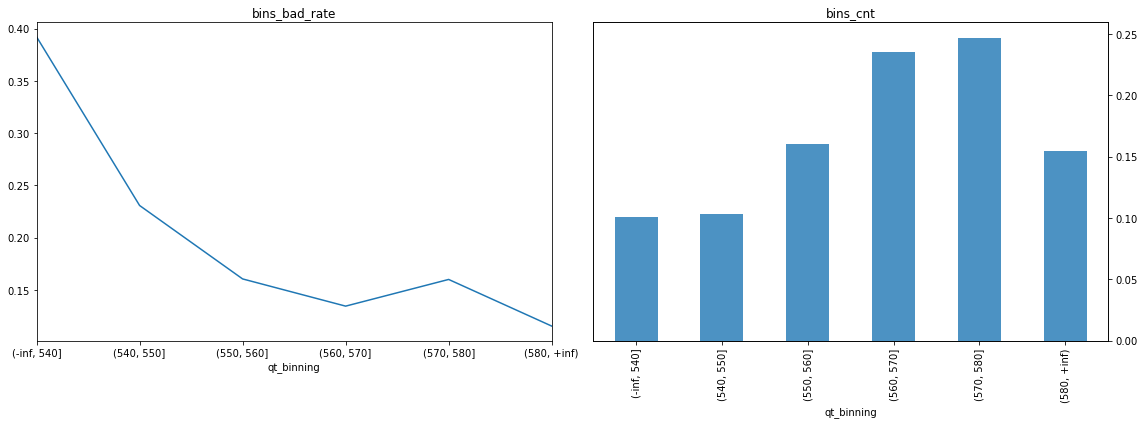

In [345]:
binning_plot(var_bin_sh1)

In [346]:
var_bin_sh1

,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 540]",491,540,51,0.100791,20,31,0.222222,0.074519,0.392157,1.092621,0.161383
"(540, 550]",541,550,52,0.102767,12,40,0.133333,0.096154,0.230769,0.326903,0.012154
"(550, 560]",551,560,81,0.160079,13,68,0.144444,0.163462,0.160494,-0.123683,0.002352
"(560, 570]",561,570,119,0.235178,16,103,0.177778,0.247596,0.134454,-0.331265,0.023128
"(570, 580]",571,580,125,0.247036,20,105,0.222222,0.252404,0.160000,-0.127352,0.003844
"(580, +inf)",581,607,78,0.154150,9,69,0.100000,0.165865,0.115385,-0.506006,0.033328


## score2

In [336]:
data_sh2=data_sh[data_sh['product_category']=='小额']

In [337]:
#bins_sh =[530,540,550,560,600]
bins_sh2 =[500,530,540,550,560,580,600]
var_sh2='score2'
var_bin_sh2 = variable_binning(data_sh2, target, var_sh2, bins_sh2, 'bins')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


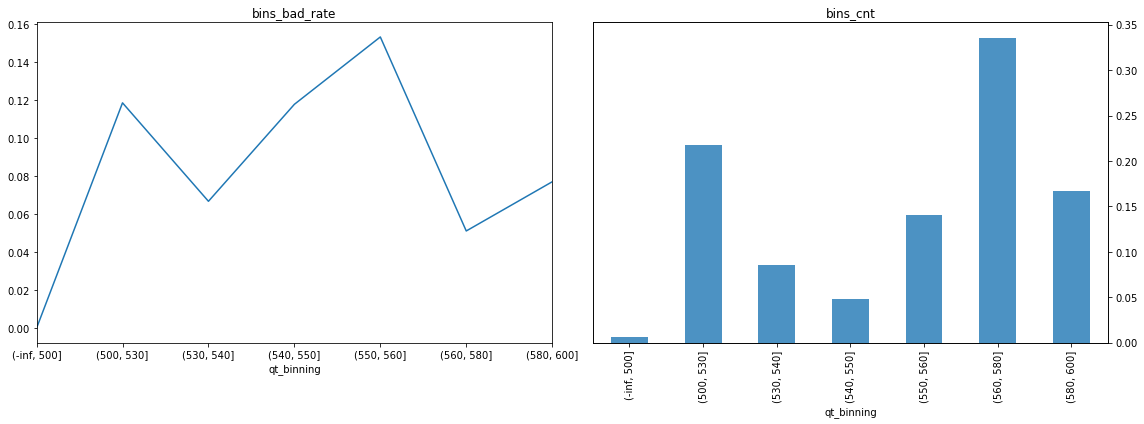

In [338]:
binning_plot(var_bin_sh2)

In [339]:
var_bin_sh2

,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 500]",500,500,4,0.005714,0,4,0.000001,0.006270,0.000000,-8.743467,0.054809
"(500, 530]",504,526,152,0.217143,18,134,0.290323,0.210031,0.118421,0.323736,0.025993
"(530, 540]",531,540,60,0.085714,4,56,0.064516,0.087774,0.066667,-0.307853,0.007160
"(540, 550]",541,546,34,0.048571,4,30,0.064516,0.047022,0.117647,0.316301,0.005533
"(550, 560]",551,560,98,0.140000,15,83,0.241935,0.130094,0.153061,0.620413,0.069388
"(560, 580]",561,580,235,0.335714,12,223,0.193548,0.349530,0.051064,-0.591061,0.092195
"(580, 600]",581,600,117,0.167143,9,108,0.145161,0.169279,0.076923,-0.153703,0.003707
